In [ ]:
!pip install deepface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 58.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116952 sha256=c757f65f9c8941f84e35d15d0486e325c7d53514c8cb98d24cd22ada5f9b374d
  Stored in directory: /root/.cache/pip/wheels/f7/f1/89/b9ea2bf8f80ec027a88fef1d354b3816b4d3d29530988972f6
Successfully built fire


In [ ]:
from deepface import DeepFace
result = DeepFace.verify(img1_path = "/content/drive/MyDrive/images/Sagar Tanna/download (2).jpeg", img2_path = "/content/drive/MyDrive/images/Sagar Tanna/image_0_3631.jpeg")
print(result)

Directory  /root /.deepface created
Directory  /root /.deepface/weights created
vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:09<00:00, 64.4MB/s]


{'verified': True, 'distance': 0.02743122258961539, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 41, 'y': 15, 'w': 48, 'h': 48}, 'img2': {'x': 29, 'y': 19, 'w': 49, 'h': 49}}, 'time': 29.96}


In [ ]:
dfs = DeepFace.find(img_path = "/content/drive/MyDrive/images/Sagar Tanna/download (2).jpeg", db_path = "/content/drive/MyDrive/images/Modi",enforce_detection=False)
print(dfs)

Finding representations: 100%|██████████| 13/13 [00:06<00:00,  2.09it/s]

Representations stored in /content/drive/MyDrive/images/Modi/representations_vgg_face.pkl file.Please delete this file when you add new identities in your database.
find function lasts  6.809022903442383  seconds
[Empty DataFrame
Columns: [identity, source_x, source_y, source_w, source_h, VGG-Face_cosine]
Index: []]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the image dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/images', labels='inferred', label_mode='int', validation_split=0.35, subset='training', seed=123, image_size=(256, 256)
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/images', labels='inferred', label_mode='int', validation_split=0.35, subset='validation', seed=123, image_size=(256, 256)
)

# Get class names from directory names
class_names = train_ds.class_names

# Data augmentation
data_augmentation = tf.keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip('horizontal'),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
    ]
)

# Define the model architecture
inputs = layers.Input(shape=(256, 256, 3)) # Modify input shape to match the image size
x = data_augmentation(inputs)
x = tf.keras.applications.vgg16.preprocess_input(x)
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(len(class_names), activation='softmax')(x) # Modify output layer to match the number of classes

# Create the model
model = models.Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=8)

# Evaluate the model
model.evaluate(val_ds)

# Save the model
model.save('person_recognition_model.h5')


Found 38 files belonging to 3 classes.
Using 25 files for training.
Found 38 files belonging to 3 classes.
Using 13 files for validation.
Epoch 1/8
1/1 [==============================] - 15s 15s/step - loss: 21.3780 - accuracy: 0.4000 - val_loss: 2308.1934 - val_accuracy: 0.3077
Epoch 2/8
1/1 [==============================] - 0s 328ms/step - loss: 2167.7024 - accuracy: 0.3600 - val_loss: 423.3584 - val_accuracy: 0.6154
Epoch 3/8
1/1 [==============================] - 0s 340ms/step - loss: 507.5429 - accuracy: 0.5200 - val_loss: 572.0455 - val_accuracy: 0.3846
Epoch 4/8
1/1 [==============================] - 0s 402ms/step - loss: 546.2883 - accuracy: 0.3200 - val_loss: 18.7050 - val_accuracy: 0.7692
Epoch 5/8
1/1 [==============================] - 1s 553ms/step - loss: 41.8553 - accuracy: 0.7600 - val_loss: 22.1170 - val_accuracy: 0.7692
Epoch 6/8
1/1 [==============================] - 0s 413ms/step - loss: 5.2412 - accuracy: 0.8400 - val_loss: 32.6871 - val_accuracy: 0.6154
Epoch 7/8


In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the saved model
model = tf.keras.models.load_model('/content/person_recognition_model.h5')

# Load and preprocess the input image
img = Image.open('/content/drive/MyDrive/images/Sagar Tanna/download (2).jpeg')
img = img.resize((256, 256))
img = np.array(img)
img = img / 255.0
img = np.expand_dims(img, axis=0)

# Make predictions on the input image
predictions = model.predict(img)

# Get the label with highest probability
label = np.argmax(predictions)

# Get the corresponding directory name as the label
label_name = train_ds.class_names[label]

print(label_name)


1/1 [==============================] - 0s 329ms/step
Sagar Tanna


In [ ]:
import tensorflow as tf

# Load the image dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/images/', 
    labels='inferred', 
    label_mode='categorical',  # Use categorical labels instead of integers
    validation_split=0.2, 
    subset='training', 
    seed=123, 
    image_size=(256, 256)
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/images/', 
    labels='inferred', 
    label_mode='categorical',  # Use categorical labels instead of integers
    validation_split=0.2, 
    subset='validation', 
    seed=123, 
    image_size=(256, 256)
)

# Define data augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
])

# Define the model architecture
inputs = tf.keras.Input(shape=(256, 256, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.vgg16.preprocess_input(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

# Create the model
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

# Evaluate the model
model.evaluate(val_ds)

# Save the model
model.save('person_model.h5')


Found 38 files belonging to 3 classes.
Using 31 files for training.
Found 38 files belonging to 3 classes.
Using 7 files for validation.


Epoch 1/10


1/1 [==============================] - 16s 16s/step - loss: 14.3528 - accuracy: 0.3548 - val_loss: 1412.6970 - val_accuracy: 0.4286
Epoch 2/10
1/1 [==============================] - 5s 5s/step - loss: 1682.4276 - accuracy: 0.3226 - val_loss: 397.5055 - val_accuracy: 0.2857
Epoch 3/10
1/1 [==============================] - 8s 8s/step - loss: 331.5421 - accuracy: 0.4516 - val_loss: 339.5858 - val_accuracy: 0.5714
Epoch 4/10
1/1 [==============================] - 6s 6s/step - loss: 268.8915 - accuracy: 0.5484 - val_loss: 133.1013 - val_accuracy: 0.5714
Epoch 5/10
1/1 [==============================] - 6s 6s/step - loss: 114.9097 - accuracy: 0.6452 - val_loss: 18.1379 - val_accuracy: 0.7143
Epoch 6/10
1/1 [==============================] - 8s 8s/step - loss: 16.6695 - accuracy: 0.6774 - val_loss: 39.3689 - val_accuracy: 0.7143
Epoch 7/10
1/1 [==============================] - 5s 5s/step - loss: 9.8961 - accuracy: 0.6774 - val_loss: 32.1688 - val_accuracy: 0.8571
Epoch 8/10
1/1 [===========

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the saved model
model = tf.keras.models.load_model('/content/person_recognition_model.h5')

# Load and preprocess the input image
img = Image.open('/content/drive/MyDrive/images/Sagar Tanna/download (2).jpeg')
img = img.resize((256, 256))
img = np.array(img)
img = img / 255.0
img = np.expand_dims(img, axis=0)

# Make predictions on the input image
predictions = model.predict(img)

# Get the label with highest probability
label = np.argmax(predictions)

# Get the corresponding directory name as the label
label_name = train_ds.class_names[label]

print(label_name)



1/1 [==============================] - 0s 243ms/step
Anandi Patel


In [ ]:
import os
import cv2
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Define the directory path containing the dataset of the person of interest
person_dir = '/content/drive/MyDrive/images/Sagar Tanna'

# Define the size of the input image and the number of channels
img_size = (224, 224)
num_channels = 3

# Define the number of epochs and the batch size for training the model
epochs = 10
batch_size = 32

# Load the pre-trained VGG16 model without the top layer
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], num_channels))

# Freeze the weights of the pre-trained layers so that they are not retrained during training
for layer in vgg16_model.layers:
    layer.trainable = False

# Define the model architecture by adding a new top layer for binary classification
model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the function to read and preprocess the images
def read_and_preprocess_images(directory_path):
    images = []
    labels = []
    for file_name in os.listdir(directory_path):
        if file_name.endswith('.jpg') or file_name.endswith('.jpeg') or file_name.endswith('.png'):
            image_path = os.path.join(directory_path, file_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, img_size)
            images.append(image)
            labels.append(1 if directory_path.split('/')[-1] == file_name.split('_')[0] else 0)  # Set label to 1 if directory name matches image name, else 0
    return np.array(images), np.array(labels)

# Read and preprocess the images from the person of interest's dataset directory
person_images, person_labels = read_and_preprocess_images(person_dir)

# Train the model on the preprocessed images and labels
model.fit(person_images, person_labels, epochs=epochs, batch_size=batch_size)

# Define the function to classify a new image
def classify_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, img_size)
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    return "person of interest" if prediction > 0.5 else "other person"

# Test the model on a new image
test_image_path = '/content/drive/MyDrive/images/Sagar Tanna/download (2).jpeg'
classification = classify_image(test_image_path)
print("The image is classified as:", classification)


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 1.7734 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 56ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 61ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 61ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 61ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
1/1 [===============

In [ ]:
# Test the model on a new image
test_image_path = '/content/drive/MyDrive/images/Modi/download (1).jpeg'
classification = classify_image(test_image_path)
print("The image is classified as:", classification)


1/1 [==============================] - 1s 510ms/step
The image is classified as: other person


In [ ]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/keras_model.h5", compile=False)

# Load the labels
class_names = open("/content/labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("/content/download.jpeg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)


1/1 [==============================] - 2s 2s/step
Class: Modi
Confidence Score: 0.982602


In [ ]:
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained model
model = load_model("/content/new_keras_model.h5")

# Freeze the layers of the pre-trained model
for layer in model.layers:
    layer.trainable = False

# Replace the final classification layer of the pre-trained model
num_classes = 10  # replace with the number of classes in your new dataset
x = model.layers[-2].output
predictions = Dense(num_classes, activation="softmax")(x)
model = Model(inputs=model.input, outputs=predictions)

# Compile the model with a new loss function and optimizer
learning_rate = 0.001
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=learning_rate), metrics=["accuracy"])

# Set up data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training and validation data
train_dir = "/content/drive/MyDrive/images/Sagar Tanna"
valid_dir = "/content/drive/MyDrive/images/Sagar Tanna"
batch_size = 32
input_shape = (224, 224, 3)  # specify the input shape of the model
train_generator = train_datagen.flow_from_directory(train_dir, target_size=input_shape[:2], batch_size=batch_size, class_mode="categorical")
valid_generator = test_datagen.flow_from_directory(valid_dir, target_size=input_shape[:2], batch_size=batch_size, class_mode="categorical")

# Train the model on the new dataset
num_epochs = 10  # replace with the desired number of epochs
model.fit_generator(train_generator, epochs=num_epochs, validation_data=valid_generator)

# Evaluate the model on a validation set
loss, accuracy = model.evaluate_generator(valid_generator)
print("Validation accuracy:", accuracy)

# Fine-tune the model by unfreezing some of the layers
for layer in model.layers[-10:]:
    layer.trainable = True
learning_rate = 0.0001
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=learning_rate), metrics=["accuracy"])
model.fit_generator(train_generator, epochs=num_epochs, validation_data=valid_generator)

# Save the model
model.save('my_model.h5')


ValueError: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
IMG_WIDTH, IMG_HEIGHT = 224, 224
NUM_EPOCHS = 10
BATCH_SIZE = 4
NUM_CLASSES = 1  # since we only have one person to recognize

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '/path/to/directory',  # replace with the path to your directory containing the images
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=BATCH_SIZE,
        class_mode='binary')  # since we only have one class

# Load pre-trained model
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_WIDTH, IMG_HEIGHT, 3),
    include_top=False,
    weights='imagenet')

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add a new output layer
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(NUM_CLASSES, activation='sigmoid')(x)

# Create the new model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    epochs=NUM_EPOCHS,
    steps_per_epoch=train_generator.samples // BATCH_SIZE)

# Save the model
model.save('person_recognition_model.h5')

In [ ]:
import os
import random
import numpy as np
from PIL import Image
import tensorflow as tf

# Define the Siamese network
def get_siamese_model(input_shape):
    left_input = tf.keras.layers.Input(input_shape)
    right_input = tf.keras.layers.Input(input_shape)

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(64, (10,10), activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Conv2D(128, (7,7), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Conv2D(128, (4,4), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Conv2D(256, (4,4), activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(4096, activation='sigmoid'))

    # Generate the encodings (feature vectors) for the two images
    encoded_l = model(left_input)
    encoded_r = model(right_input)

    # Add a custom layer to compute the absolute difference between the encodings
    L1_layer = tf.keras.layers.Lambda(lambda tensors:tf.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])

    # Add a final dense layer with a sigmoid activation for classification
    prediction = tf.keras.layers.Dense(1, activation='sigmoid')(L1_distance)

    siamese_model = tf.keras.models.Model(inputs=[left_input,right_input],outputs=prediction)

    return siamese_model
# Function to generate pairs of images with their corresponding similarity/dissimilarity labels
def generate_image_pairs(directory1, directory2, num_pairs):
    """
    Generates pairs of images with their corresponding similarity/dissimilarity labels
    """
    # Get a list of all the image file names in directory1
    images1 = os.listdir(directory1)
    # Get a list of all the image file names in directory2
    images2 = os.listdir(directory2)

    # Generate pairs of images
    pairs = []
    labels = []
    for i in range(num_pairs):
        # Randomly select two images from directory1
        img1_file = random.choice(images1)
        img2_file = random.choice(images1)
        img1_path = os.path.join(directory1, img1_file)
        img2_path = os.path.join(directory1, img2_file)
        img1 = Image.open(img1_path).resize((224, 224))
        img2 = Image.open(img2_path).resize((224, 224))
        # Append the pair of images and a similarity label (1) to the pairs list
        pairs.append([np.array(img1), np.array(img2)])
        labels.append(1)

        # Randomly select an image from directory2
        img2_file = random.choice(images2)
        img2_path = os.path.join(directory2, img2_file)
        img2 = Image.open(img2_path).resize((224, 224))
        # Append the pair of images and a dissimilarity label (0) to the pairs list
        pairs.append([np.array(img1), np.array(img2)])
        labels.append(0)

    # Convert the pairs and labels lists to numpy arrays
    pairs = np.array(pairs)
    labels = np.array(labels)

    return pairs, labels
# Define the directories containing the images
directory1 = '/content/drive/MyDrive/images/Modi'
directory2 = '/content/drive/MyDrive/images/Sagar Tanna'

# Define the input shape for the Siamese network
input_shape = (224, 224, 3)

# Define the number of pairs of images to generate for training
num_pairs = 30

# Generate pairs of images with their corresponding similarity/dissimilarity labels
image_pairs, image_labels = generate_image_pairs(directory1, directory2, num_pairs)

# Create the Siamese model
siamese_model = get_siamese_model(input_shape)

# Compile the model with binary cross-entropy loss and Adam optimizer
siamese_model.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(lr=0.0001))

# Train the model on the generated image pairs and labels
siamese_model.fit(image_pairs, image_labels, batch_size=32, epochs=10)

# Save the trained model
siamese_model.save('/content/')


Epoch 1/10


ValueError: ignored

In [ ]:
!pip install face-recognition
#!pip install dlib[cpu]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=fd2894e520c44d8a653fdb5d9f8ca2a43d29f6512aba0adb2c36dfbd934db9ee
  Stored in directory: /root/.cache/pip/wheels/22/a8/60/4a2aeb763d63f50190f4c4e07069a22245347eeafdb3a67551
Successfully built face-recognition-models


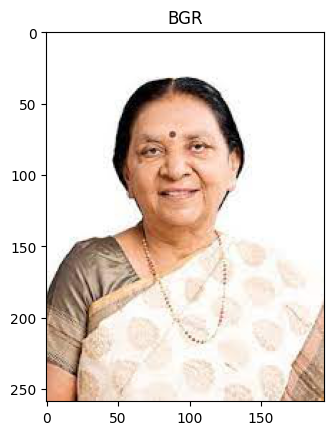

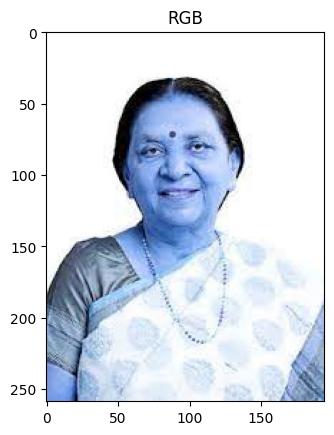

In [ ]:
import cv2
import numpy as np
import face_recognition
import matplotlib.pyplot as plt

imgelon_bgr = face_recognition.load_image_file('/content/drive/MyDrive/images/Anandi Patel/download (1).jpeg')
imgelon_rgb = cv2.cvtColor(imgelon_bgr,cv2.COLOR_BGR2RGB)

plt.imshow(imgelon_bgr)
plt.title('BGR')
plt.show()

plt.imshow(imgelon_rgb)
plt.title('RGB')
plt.show()

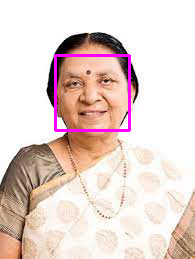

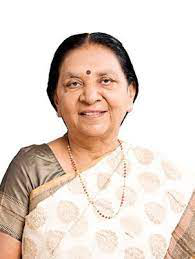

-1

In [ ]:
from google.colab.patches import cv2_imshow

imgelon = face_recognition.load_image_file('/content/drive/MyDrive/images/Anandi Patel/download (1).jpeg')
imgelon = cv2.cvtColor(imgelon, cv2.COLOR_BGR2RGB)

#----------Finding face Location for drawing bounding boxes-------
face = face_recognition.face_locations(imgelon_rgb)[0]
copy = imgelon.copy()

#-------------------Drawing the Rectangle-------------------------
cv2.rectangle(copy, (face[3], face[0]), (face[1], face[2]), (255, 0, 255), 2)
cv2_imshow(copy)
cv2_imshow(imgelon)
cv2.waitKey(0)

In [ ]:
train_elon_encodings = face_recognition.face_encodings(imgelon)[0]

In [ ]:
# lets test an image
test = face_recognition.load_image_file('/content/drive/MyDrive/images/Modi/download (1).jpeg')
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
test_encode = face_recognition.face_encodings(test)[0]
print(face_recognition.compare_faces([train_elon_encodings], test_encode)) 

[False]


In [ ]:
# lets test an image
test = face_recognition.load_image_file('/content/images.jpeg')
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
test_encode = face_recognition.face_encodings(test)[0]
print(face_recognition.compare_faces([train_elon_encodings], test_encode)) 

[True]


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os

# Define image size and number of classes
img_size = 224
num_classes = 1

# Load pre-trained model
base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3))

# Add new layers on top
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
predictions = tf.keras.layers.Dense(num_classes, activation='sigmoid')(x)

# Create model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Load images from directory
dir_path = '/content/drive/MyDrive/images/Modi/'
images = []
for filename in os.listdir(dir_path):
    if filename.endswith('.jpeg'):
        path = os.path.join(dir_path, filename)
        img = cv2.imread(path)
        img = cv2.resize(img, (img_size, img_size))
        img = img.astype(np.float32) / 255.0
        images.append(img)
images = np.array(images)

# Create labels for images
labels = np.ones((images.shape[0], 1))

# Train model
model.fit(images, labels, epochs=10)

# Save model
model.save('model.h5')


Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 1.1969 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 67ms/step - loss: 0.1255 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 67ms/step - loss: 0.0180 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 69ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 68ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 53ms/step - loss: 4.9722e-04 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 54ms/step - loss: 2.2204e-04 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 59ms/step - loss: 1.1101e-04 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 58ms/step - loss: 6.0904e-05 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 51ms/step - loss: 3.6109e-05 - accuracy: 1.0000


In [ ]:
import tensorflow as tf

# Load pre-trained model
model = tf.keras.models.load_model('/content/model.h5')

# Load test image
test_image = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/images/Modi/image_0_5026.jpeg', target_size=(224, 224))

# Convert image to array and normalize
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = test_image / 255.0

# Reshape image to match model input shape
test_image = test_image.reshape(1, 224, 224, 3)

# Predict the identity of the person in the image
predictions = model.predict(test_image)

# Print the predicted identity
print(predictions)


1/1 [==============================] - 1s 942ms/step
[[0.9999794]]


In [ ]:
!pip install face-recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=94717798bd967924d4f07410a00a2a44a42805db303d06e04b8e33f4a7db8d1a
  Stored in directory: /root/.cache/pip/wheels/22/a8/60/4a2aeb763d63f50190f4c4e07069a22245347eeafdb3a67551
Successfully built face-recognition-models


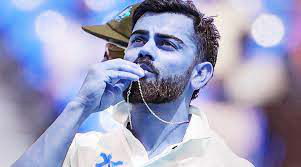

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import face_recognition

# Load the reference face image
reference_image = face_recognition.load_image_file("/content/download (3).jpeg")
reference_face_encoding = face_recognition.face_encodings(reference_image)[0]

# Load the input image for verification
input_image = face_recognition.load_image_file("/content/download (7).jpeg")

# Detect faces in the input image
face_locations = face_recognition.face_locations(input_image)

for face_location in face_locations:
    # Encode the face in the input image
    input_face_encoding = face_recognition.face_encodings(input_image, [face_location])[0]

    # Compare the encoded face with the reference face
    distance = face_recognition.face_distance([reference_face_encoding], input_face_encoding)

    # Set a threshold for similarity comparison
    threshold = 0.6

    # Draw a rectangle around the face and display similarity score
    if distance < threshold:
        cv2.rectangle(input_image, (face_location[3], face_location[0]),
                      (face_location[1], face_location[2]), (0, 255, 0), 2)
        cv2.putText(input_image, f"Similarity: {1 - distance[0]:.2f}", (face_location[3], face_location[0] - 20),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
        print(f"Similarity: {1 - distance[0]:.2f}")
        print("Person is the same.")
    else:
        cv2.rectangle(input_image, (face_location[3], face_location[0]),
                      (face_location[1], face_location[2]), (0, 0, 255), 2)
        cv2.putText(input_image, f"Similarity: {1 - distance[0]:.2f}", (face_location[3], face_location[0] - 20),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
        print(f"Similarity: {1 - distance[0]:.2f}")
        print("Person is not the same.")

# Display the input image with face verification results
cv2_imshow(input_image)

In [ ]:
!pip install sklearn==1.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sklearn==1.1.2 (from versions: 0.0, 0.0.post1, 0.0.post2, 0.0.post4)
ERROR: No matching distribution found for sklearn==1.1.2


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

# load the boston dataset
boston = datasets.load_boston(return_X_y=False)

# defining feature matrix(X) and response vector(y)
X = boston.data
y = boston.target
print(X)
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

# create linear regression object
reg = linear_model.LinearRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

# plot for residual error

## setting plot style
plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
			color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
			color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## plotting legend
plt.legend(loc = 'upper right')

## plot title
plt.title("Residual errors")

## method call for showing the plot
plt.show()

ImportError: ignored